In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import magic_input_processing as magic

In [2]:
# Make an empty dataframe that will later contain your input data.
# The range provided is the years (inclusive) that you want in your input data.
df = magic.empty_input_df(1850, 2020)

# Use the pandas library to read in data from various locations. You need them in a pandas dataframe form.
# You can e.g. use pd.read_excel or pd.read_csv depending on your source.

# Right now precipitation and air temperature has to be daily values (I will maybe make it accept a source that is monthly later)
# The columns can be called whatever you want.

met_df = pd.read_excel('example_met_Birkenes.xls', sheet_name='Ark1', index_col='Date', parse_dates=True)

met_df

,P,T
Date,,
1970-12-31,0.000000,-9.421179
1971-01-01,0.000000,-10.657111
1971-01-02,0.000000,-9.518103
1971-01-03,0.062504,-2.644568
1971-01-04,0.151470,0.754633
...,...,...
2019-06-25,9.851470,14.191309
2019-06-26,0.000000,17.754633
2019-06-27,0.000000,16.635248


In [3]:
# Example of a df that can be used to patch the deposition series. The values are relative to a reference year that you provide
# yourself below. You can also read this in from an excel file like above. The one here is made for Birkenes

emep_df = magic.get_emep_deposition_scales()

emep_df

,Ca,SO4,NH4,NO3
Date,,,,
1850-01-01,0.05,0.05,0.00,0.00
1915-01-01,0.61,0.61,NaN,NaN
1925-01-01,0.64,0.64,NaN,NaN
1940-01-01,0.78,0.78,NaN,NaN
1955-01-01,1.20,1.20,NaN,NaN
1960-01-01,1.26,1.26,0.99,0.53
1965-01-01,1.48,1.48,1.00,0.63
1970-01-01,1.60,1.60,1.02,0.74
1975-01-01,1.41,1.41,1.12,0.76


In [4]:
# Similarly, read in runoff data from excel. This does not have to be in a separate document from the precip and air temp.
# That is just how I organized this example.

runoff_df = pd.read_excel('example_runoff_Birkenes.xls', sheet_name='Ark1', index_col='Date', parse_dates=True)

runoff_df

,Q,Q[L/s]
Date,,
1980-01-01,2.150327,10.2041
1980-01-02,1.788585,8.4875
1980-01-03,1.180814,5.6034
1980-01-04,0.931750,4.4215
1980-01-05,0.931750,4.4215
...,...,...
2017-12-27,6.321951,30.0000
2017-12-28,2.107317,10.0000
2017-12-29,2.107317,10.0000


In [5]:
# Read in deposition data (concentration in precipitation). These can be daily, monthly or yearly in the source.
# The columns should include SO4, NO3, NH4, Ca, and one of Mg or Cl (depending on what you use for sea salt correction)

dep_df = pd.read_excel('example_dep_Birkenes.xls', sheet_name='Ark1', index_col='year', parse_dates=True)

dep_df

,SO4,NO3,NH4,Ca,Mg,Na,Cl,K,pH
year,,,,,,,,,
1973-01-01,1.06,NaN,NaN,NaN,0.11,NaN,NaN,NaN,4.27
1974-01-01,1.11,0.50,0.52,0.23,0.19,NaN,NaN,NaN,4.25
1975-01-01,1.01,0.49,0.45,0.19,0.17,NaN,NaN,NaN,4.27
1976-01-01,1.18,0.63,0.50,0.17,0.12,NaN,NaN,NaN,4.21
1977-01-01,1.04,0.54,0.54,0.17,0.17,1.3741,2.5139,NaN,4.27
1978-01-01,1.17,0.62,0.57,0.17,0.12,0.9523,1.7058,NaN,4.11
1979-01-01,1.25,0.57,0.65,0.22,0.15,1.2625,2.3349,NaN,4.09
1980-01-01,1.23,0.57,0.63,0.22,0.11,0.8457,1.5760,0.1600,4.16
1981-01-01,1.04,0.52,0.53,0.20,0.13,0.9864,1.8236,0.1422,4.21


In [6]:
# Read in observed runoff concentrations. You should at least have SO4
# and one of Cl or Mg (depending on which one you use for sea salt correction).

runoff_chem_df = pd.read_excel('example_runoff_chem_Birkenes.xls', sheet_name='Ark1', index_col='year', parse_dates=True)

runoff_chem_df

,Ca,Mg,Na,K,NH4,SO4,Cl,NO3,F,H+,Alt observed
year,,,,,,,,,,,
1974-01-01,62.375000,40.307400,142.680000,3.579800,NaN,164.478000,141.050000,5.577000,NaN,33.900000,NaN
1975-01-01,61.876000,36.194400,124.845000,3.835500,NaN,139.494000,126.945000,4.862000,NaN,27.300000,NaN
1976-01-01,65.369000,39.484800,117.450000,5.881100,NaN,160.314000,98.735000,4.790500,NaN,36.500000,NaN
1977-01-01,58.383000,40.307400,111.795000,10.228000,NaN,149.904000,121.303000,9.938500,NaN,32.200000,NaN
1978-01-01,61.377000,34.549200,107.010000,9.205200,NaN,141.576000,104.377000,9.080500,NaN,20.900000,NaN
1979-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-01,56.387000,32.904000,113.535000,3.324100,NaN,141.576000,121.303000,9.295000,NaN,26.200000,NaN
1981-01-01,55.888000,36.194400,115.275000,4.091200,NaN,154.068000,124.124000,6.506500,NaN,32.700000,NaN
1982-01-01,59.381000,37.839600,122.235000,4.346900,NaN,143.658000,143.871000,6.363500,NaN,31.800000,NaN


In [7]:

# Add the precipitation time series to the input data. The patch ref range is the range that it uses for computing
# averages that it uses to patch in missing values. The series you provide has to be without holes from its own start to end.
magic.add_precip_ts(df, met_df['P'], patch_ref_range=(1981, 1991))

# Add a runoff series.
#NOTE: The Runoff series should not be patched at all. It will only be used for reference in the deposition correction
#      and for calibrating the eventual hydr. module.
magic.add_runoff_ts(df, runoff_df['Q'])

# Add in air temperature series similarly to precipitation.
magic.add_air_temperature_ts(df, met_df['T'], patch_ref_range=(1971, 1981))


# Add in sea salt corrected deposition.
# Before adding this you have to add Precipitation, Runoff series to your input dataframe.
# The runoff series has to be valid for the sea_salt_ref_range. The precipitation and measured deposition series should be
# valid for the patch_ref_range and the ca_ref_range. Note that measured deposition series are linearly interpolated between
# valid values, so it is ok with a few holes.

'''
df  : The dataframe you want to write the inputs to. It must already have a 'Precipitation' and a 'Runoff' column
dep_df : A date-indexed dataframe with observed concentrations in precipitation, with columns ['Ca', 'Mg', 'Na', 'K', 'NH4', 'SO4', 'Cl', 'NO3', 'F']   F is optional
runoff_chem_df : A date-indexed dataframe with observed concentrations in runoff, with the same columns as source_df.
source_is_mg_l : True if the unit of the source_df is mg/l, False if they are meq/m3=µeq/l
runoff_is_mg_l : True if the unit of the runoff_df is mg/l, False if they are meq/m3=µeq/l
n_dep_given_as_n : Only relevant if source is mg/l: True if the mass of NO3 and NH4 deposition is given as the mass of N, False if it is given as the mass of the full molecule.
s_dep_given_as_s : Only relevant if source is mg/l: True if the mass of SO4 deposition is given as the mass of S, False if it is given as the mass of the full molecule.
sea_salt_ref : The reference deposition series for sea salt correction. Usually 'Cl', but can also use 'Mg'.
sea_salt_ref_range : pair (start_year, end_year). This is the range that is used to compute the sea_salt_factor and the SO4* factor.
patch_scale : A date-indexed dataframe containing some of the columns of the input_df. Should have some values of historical deposition relative to a reference year. Example : get_emep_deposition_scales()
patch_ref_range : pair (start_year, end_year). Range of years to compute the value for the reference value that scales the values used for patching.
so4_weathering : how much of the so4 runoff should be accounted for by weathering and not deposition
ca_ref_range : If not None, compute Ca excess deposition relative to SO4 excess deposition with reference to this range.
ca_excess_weight : Ca excess deposition relative to SO4 excess deposition is multiplied with this value
n_dry_deposition_factor : Multiply NH4 and NO3 deposition by this value
'''

magic.add_deposition_ts(df, dep_df, runoff_chem_df, sea_salt_ref='Mg', sea_salt_ref_range=(1981,2000), 
                        source_is_mg_l=True, runoff_is_mg_l=False,
                        patch_scale=emep_df, patch_ref_range=(1989,1991),
                        so4_weathering=30.0,
                        ca_ref_range=(1974,2002), ca_excess_weight=0.5, 
                        n_dry_deposition_factor=1.14)

df

The sea salt factor was: 1.48833
The SO4* factor was 1.43601
The Ca* factor was 0.105991


,Precipitation,Runoff,Air temperature,Total SO4 deposition,Total Mg deposition,Total Cl deposition,Total Ca deposition,Total NH4 deposition,Total NO3 deposition,Total Na deposition,Total K deposition,Observed runoff conc Ca,Observed runoff conc Mg,Observed runoff conc Na,Observed runoff conc K,Observed runoff conc SO4,Observed runoff conc Cl,Observed runoff conc NO3,Observed runoff conc H+
1850-01-01,155.254773,NaN,-2.873948,0.488541,3.565892,18.193325,0.694078,0.000000,0.000000,15.573486,0.327480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-02-01,100.116875,NaN,-3.356035,0.319562,2.299484,11.732063,0.447774,0.003063,0.001844,10.042646,0.211177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-03-01,149.019718,NaN,-1.194862,0.482387,3.422685,17.462678,0.666781,0.009119,0.005489,14.948053,0.314328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-04-01,65.868975,NaN,3.077938,0.216199,1.512879,7.718769,0.294855,0.006046,0.003640,6.607266,0.138938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1850-05-01,85.859675,NaN,9.066993,0.285693,1.972025,10.061352,0.384507,0.010508,0.006325,8.612518,0.181104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,150.477237,NaN,15.186479,2.101381,2.580600,13.166329,0.526649,3.553412,3.798475,11.270377,0.236994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01,161.618689,NaN,10.857985,2.256969,2.771670,14.141174,0.565642,3.816510,4.079717,12.104845,0.254541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-01,210.531865,NaN,6.622640,2.940031,3.610504,18.420937,0.736832,4.971560,5.314426,15.768322,0.331577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-01,157.760666,NaN,2.816742,2.203093,2.705507,13.803608,0.552140,3.725405,3.982330,11.815888,0.248465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


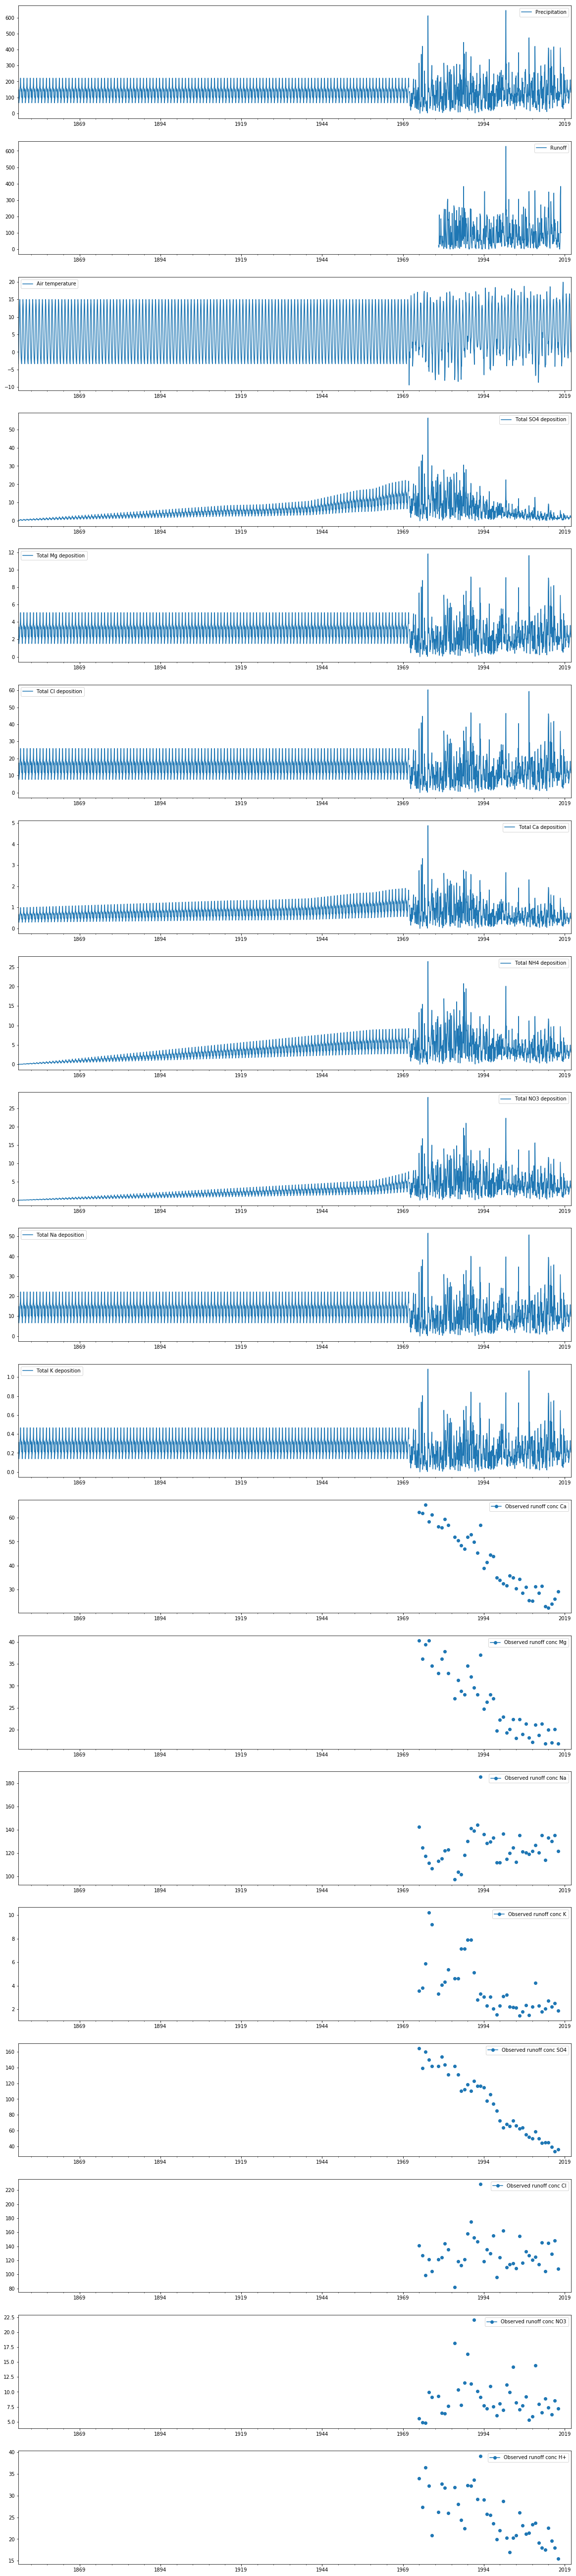

In [8]:
# Plot the series that you have added to your input dataframe

magic.plot_inputs(df)

In [9]:
# Export the input dataframe to a Mobius input file.

magic.write_as_input_file(df, 'test_inputs.dat')